# Titanic: Machine Learning from Disaster

## 1. Data Overview (from Kaggle)

### 1.1 Competition Description  
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### 1.2 Data Dictionary  
|Variable|Definition|Key|Type of Variable|Data Type|Variable Category|
|--------|----------|---|----------------|---------|-----------------|
|survival|Survival|0 = No, 1 = Yes|Target variable|Numeric|Categorical|
|pclass|Ticket class||Predictor variable|Numeric|Categorical|
|name|Passenger name||Predictor variable|Character|Categorical|
|sex|Sex||Predictor variable|Character|Categorical|
|Age|Age in years||Predictor varible|Numeric|Continuous|
|sibsp|# of siblings / spouses aboard the Titanic||Predictor variable|Numeric|Continuous|
|parch|# of parents / children aboard the Titanic||Predictor variable|Numeric|Continuous|
|ticket|Ticket number||Predictor variable|Character|Categorical|
|fare|Passenger fare||Predictor variable|Numeric|Continuous|
|cabin|Cabin number||Predictor variable|Character|Categorical|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|Predictor variable|Character|Categorical|

### 1.3 Variable Notes  
__pclass__: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
__age__: Age is fractional if less than 1.  If the age is estimated, it is in the form of xx.5  

__sibsp__: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

__parch__: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

## 1.4 Exploratory Data Analysis

### 1.4.1 Univariate Analysis

In [1]:
import pandas as pd

First, we need to read in the test and train data sets.  Both data sets were provided by Kaggle.  The training set includes Survived values and the test set does not.  Predictions for test set values must be submitted to Kaggle in order to determine accuracy.

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

Now that the data has been imported, we can use the Pandas info() method to see some basic information about the training set.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training  data contains 891 records.  The Age, Cabin, and Embarked variables all appear to be missing some values and will most likely require some sort of imputation.  We may also want to modify the data types for some of these variables.  For example, the Sex variable is currently a default Pandas object, but may prove more useful if converted to a boolean value.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Name, Sex, Ticket, Cabin, and Embarked columns are currently text values.  We will most likely want to replace at least some of these with dummy variables in order to include them in the models.  

The ticket variable seems to have different formats for different values.  Further investigation will need to be done in order to determine if this variable can provide any value.  

The Cabin variable is farely sparse, but the missing values may not be random.  It is likely that cabins were only assigned to higher passenger classes.  In this very small sample of data, the two records with Cabin values are for first class passengers and the three records with null Cabin values are third class passengers.  This will require further investigation.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1.4.1.1 Continuous Variables

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

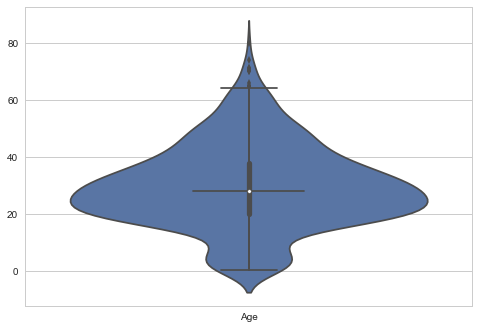

In [35]:
sns.set_style('whitegrid')

sns.violinplot(data=train['Age'])
sns.boxplot(data=train['Age'], showbox=False, width=0.25).set_xticklabels(['Age'])

The Age variable has a min of 0.42 years and a max of 80.  Both of these values seem reasonable.  The distribution of ages is slightly bimodal.  There appear to have been more children on the ship than elderly people.  The mean age is slightly below 30.

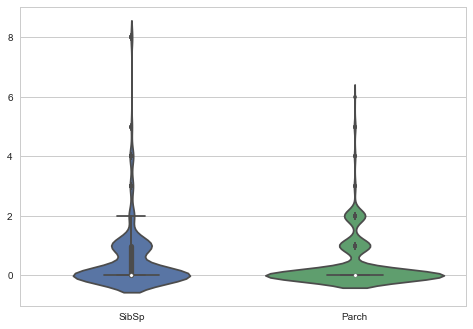

In [34]:
sns.violinplot(data=train[['SibSp','Parch']])
sns.boxplot(data=train[['SibSp','Parch']], showbox=False, width=0.25)

The SibSp and Parch variables are both extremely right-tailed.  We will most likely want to use a transform on these variables if they are going to be included in models that assume a normal distribution.  The bulk of the records have values of 0 for SibSp and Parch.  The maximum value for SibSp is 8 and the max for Parch is 6.

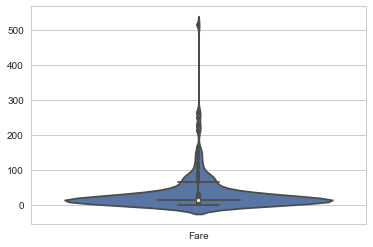

In [9]:
sns.violinplot(data=train['Fare'])
sns.boxplot(data=train['Fare'], showbox=False, width=0.25).set_xticklabels(['Fare'])

The Fare variable is also somewhat skewed.  If you look closely though, it appears that the distribution is fairly normal, but being skewed by a few severe outliers.  We will need to investigate these outliers and try to determine if they are valid.

In [10]:
train.sort_values('Fare',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


Upon further inspection, we can see that most of these outlier fares occur multiple times with more than one person having the same ticket number.  We can try to create a new feature for the individual fare, which would just be the fare divided by the number of people.  However, this method is flawed, because there are most likely instances where some of a party's members are in the training set and some are in the test set.  In order to deal with this issue, we will get a count of ticket numbers from both sets and use that to determine individual fare.  

Let's take a closer look at the values in the Ticket column before calculating these counts though.

In [22]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

We can see that the prefixes for some ticket numbers are not always formatted the same way.  For example, there are values that start with 'CA', 'CA.', and 'C.A.'.  There are also prefixes with different cases.  For example, there are tickets with prefixes of 'SC/PARIS' and also 'SC/Paris'.  In order to deal with these cases, we will write a function to remove all punction and whitespace and convert all letters to upper case.  We will also create duplicate dataframes for the test and train sets in order to leave the originals in tact.

In [12]:
import re, string

def clean_ticket(ticket):
    ticket = ticket.upper()
    ticket = ''.join(ticket.split())
    ticket = ''.join(ticket.split(string.punctuation))
    
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    ticket = regex.sub('', ticket)
    
    return ticket

In [13]:
# Create duplicate dataframes in order to leave the original data in tact
df_train = train.copy()
df_test = test.copy()

# Create a new column with the clean versions of the ticket values
df_train['clean_ticket'] = df_train['Ticket'].apply(clean_ticket)
df_test['clean_ticket'] = df_test['Ticket'].apply(clean_ticket)

df_train['clean_ticket'].unique()

array(['A521171', 'PC17599', 'STONO23101282', '113803', '373450', '330877',
       '17463', '349909', '347742', '237736', 'PP9549', '113783', 'A52151',
       '347082', '350406', '248706', '382652', '244373', '345763', '2649',
       '239865', '248698', '330923', '113788', '347077', '2631', '19950',
       '330959', '349216', 'PC17601', 'PC17569', '335677', 'CA24579',
       'PC17604', '113789', '2677', 'A52152', '345764', '2651', '7546',
       '11668', '349253', 'SCPARIS2123', '330958', 'SCA423567', '370371',
       '14311', '2662', '349237', '3101295', 'A439886', 'PC17572', '2926',
       '113509', '19947', 'CA31026', '2697', 'CA34651', 'CA2144', '2669',
       '113572', '36973', '347088', 'PC17605', '2661', 'CA29395', 'SP3464',
       '3101281', '315151', 'CA33111', 'SOC14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SOC14885', '3101278', 'WC6608',
       'SOTONOQ392086', '343275', '343276', '347466', 

The new 'clean_ticket' column now contains the ticket numbers in all caps with no punctuation marks or whitespace.  Now we can generate the counts for each ticket number.  We will do this by creating a new vector containing the clean_ticket values from both the train and test sets and then create a dictinary of the value counts for that vector.  We will then divide the fare for each passenger by their corresponding value in that dictionary and sotre the result in a new column called 'ind_fare.'

In [14]:
df_ticket = df_train['clean_ticket'].append(df_test['clean_ticket'])
ticket_counts = dict(df_ticket.value_counts())

def divide_fare(fare, ticket, lookup):
    try:
        return fare / lookup[ticket]
    except:
        return fare
    
df_train['ind_fare'] = df_train.apply(lambda x: divide_fare(x['Fare'], x['clean_ticket'], ticket_counts), axis=1)
df_test['ind_fare'] = df_test.apply(lambda x: divide_fare(x['Fare'], x['clean_ticket'], ticket_counts), axis=1)

Now, let's look at the distribution for the new ind_fare column.

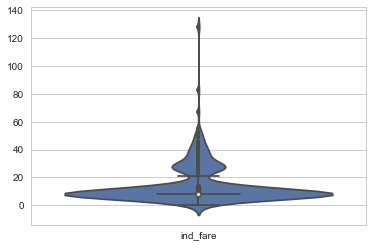

In [15]:
sns.violinplot(data=df_train['ind_fare'])
sns.boxplot(data=df_train['ind_fare'], showbox=False, width=0.25).set_xticklabels(['ind_fare'])

The values have come down quite a bit, but we still have some outliers.  Let's look a little closer at those and see if we've missed something.

In [16]:
df_train.sort_values('ind_fare',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_ticket,ind_fare
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,PC17755,128.082300
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,PC17755,128.082300
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,PC17755,128.082300
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,PC17558,82.506933
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,PC17558,82.506933
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,PC17611,66.825000
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,PC17611,66.825000
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,PC17483,55.444800
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,24160,52.834375
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,24160,52.834375


The max value for individual fare is $128.  This equates to about $3130 in 2017 dollars.  While fairly pricey, this does not seem inconceivable for first class accommodations on the maiden voyage of a luxury cruise ship. Since we can not find a valid reason to modify or remove these outliers, we will keep them in the dataset.

#### 1.4.1.2 Categorical Variables

In [41]:
pd.crosstab(index=train['Survived'],columns='count')

col_0,count
Survived,
0,549
1,342


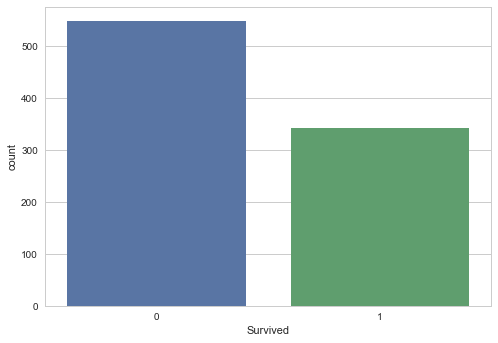

In [46]:
sns.countplot(x='Survived',data=train)

We can see that the counts of people who survived and people who died are not distributed evenly.  About two thirds of the passengers in the training data set died.  We will need to take this into consideration later on when we are contructing our models.

In [40]:
pd.crosstab(index=train['Pclass'],columns='count')

col_0,count
Pclass,
1,216
2,184
3,491


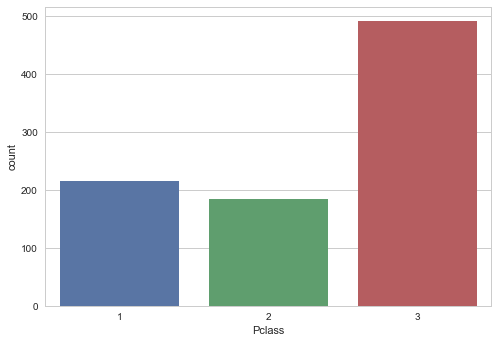

In [47]:
sns.countplot(x='Pclass',data=train)

A little more than half of the passengers had third class accommodations.  Somewhat surprisingly, there were more first class passengers than second class in the training set.

In [43]:
pd.crosstab(index=train['Sex'],columns='count')

col_0,count
Sex,
female,314
male,577


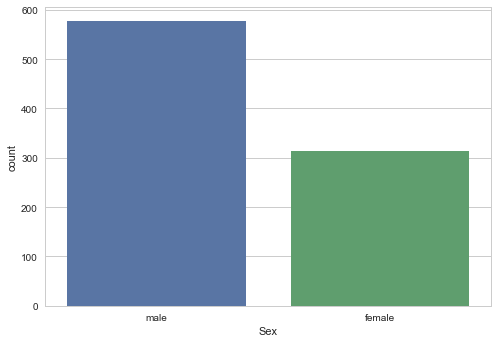

In [48]:
sns.countplot(x='Sex',data=train)

Interestingly, there are twice as many male passengers as female passengers in the training data.

In [50]:
pd.crosstab(index=train['Embarked'],columns='count')

col_0,count
Embarked,
C,168
Q,77
S,644


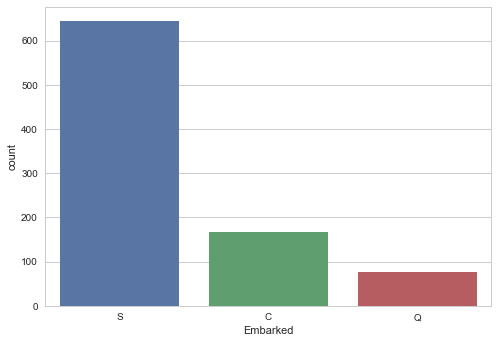

In [51]:
sns.countplot(x='Embarked',data=train)

The vast majority of the passengers embarked at the origin port of Southampton.  Of the remaining passengers, the number of passengers who boarded in Cherbourg was about twice as many as those who boarded in Queenstown.

Next, we'll plot a correlation matrix of the training data to see if any of the features are correlated with each other.

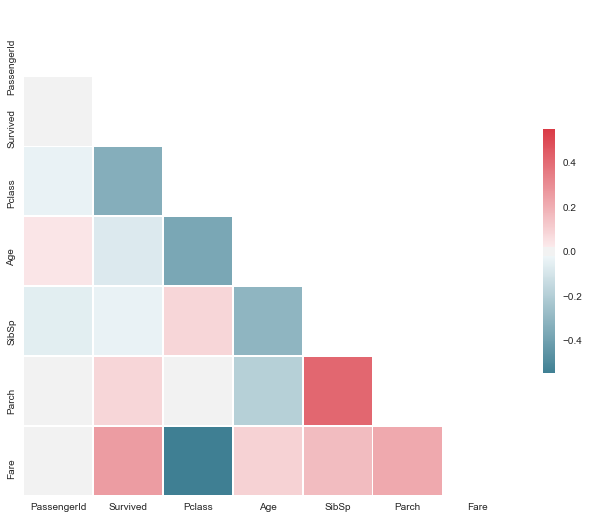

In [17]:
# Set the style for the plot
sns.set(style='white')

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidth=0.5, cbar_kws={'shrink': 0.5})

In [18]:
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
